### Plot Prediction Result to ROC Curve

In [24]:
import os
import matplotlib.pyplot as plt
import math
import numpy as np
from PIL import Image
from glob import glob
import pandas as pd
from tqdm import tqdm
import pandas as pd
import pickle

from sklearn.metrics import (
    accuracy_score, auc, roc_curve, precision_score, recall_score
)

#### Post Process Prediction Mask

In [2]:
SAMPLE_PRED_DATA_DIR = '/Users/seung-jae_bang/Personal/Columbia/Applied_DL/Camelyon_Project/data/saved_model_outputs/vgg_transfer_learn_zoom1_256_256/inference'

inference_file_name = 'zoom_1_256_256_test_inference_result.pkl'



In [3]:
inference_df = pd.read_pickle(os.path.join(SAMPLE_PRED_DATA_DIR, inference_file_name))

In [4]:
inference_df.head()

,file_name,img_id,include,label,non_gray_ratio,type,is_roi,y_pred_prob
100000,tumor_slide_002_split_67_138.png,002,0,0,0.000000,test,0,0.009275
100001,tumor_slide_002_split_272_51.png,002,0,0,0.000000,test,0,0.009275
100002,tumor_slide_002_split_125_13.png,002,0,0,0.000000,test,0,0.008561
100003,tumor_slide_002_split_223_9.png,002,0,0,0.000000,test,0,0.008327
100004,tumor_slide_002_split_230_156.png,002,0,0,0.034546,test,0,0.002517


In [5]:
inference_df.loc[inference_df['is_roi']==0, 'y_pred_prob'] = 0

In [6]:
inference_df.shape

(216788, 8)

In [7]:
inference_df.head()

,file_name,img_id,include,label,non_gray_ratio,type,is_roi,y_pred_prob
100000,tumor_slide_002_split_67_138.png,002,0,0,0.000000,test,0,0.0
100001,tumor_slide_002_split_272_51.png,002,0,0,0.000000,test,0,0.0
100002,tumor_slide_002_split_125_13.png,002,0,0,0.000000,test,0,0.0
100003,tumor_slide_002_split_223_9.png,002,0,0,0.000000,test,0,0.0
100004,tumor_slide_002_split_230_156.png,002,0,0,0.034546,test,0,0.0


In [8]:
inference_df.dtypes

file_name          object
img_id             object
include             int64
label              object
non_gray_ratio    float64
type               object
is_roi              int64
y_pred_prob       float32
dtype: object

In [9]:
# inference_df = inference_df[inference_df['is_roi'] == 1]

In [10]:
y_test = inference_df['label'].astype(int).values
y_test_pred_prob = inference_df['y_pred_prob'].values
y_test_pred = (y_test_pred_prob > 0.5).astype(int)
y_test_pred_dummy = np.zeros_like(y_test_pred)

In [11]:
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)

In [12]:
roc_auc = auc(fpr, tpr)

In [14]:
result = [
    {
        'model': 'zoom_1_vgg16_transfer',
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'AUC': roc_auc,
    },
    {
        'model': 'dummy *',
        'Accuracy': accuracy_score(y_test, y_test_pred_dummy),
    }
]

In [16]:
pd.DataFrame(result)[['model', 'AUC', 'Accuracy', 'Precision', 'Recall']].to_csv('./model_output_whole_slide.csv', index=False)

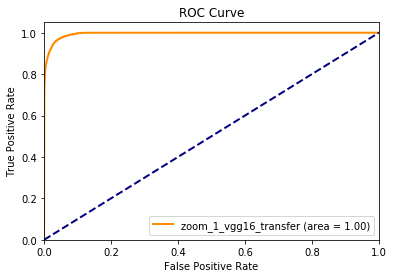

In [19]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='zoom_1_vgg16_transfer (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
# plt.show()
plt.savefig('./roc_curve_whole_slide.jpg')

In [21]:
os.listdir(temp)

['download.png',
 '.DS_Store',
 'weights',
 'history.pkl',
 'inference',
 'temp.png']

In [25]:
with open(os.path.join(SAMPLE_PRED_DATA_DIR, '..', 'history.pkl'), 'rb') as f:
    history = pickle.load(f)

In [27]:
history = pd.DataFrame(history)

In [29]:
history['epochs'] = np.arange(1, len(history) + 1)

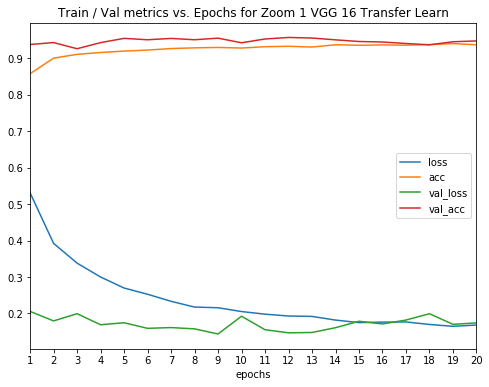

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
history.set_index('epochs').plot(
    xticks=np.arange(1, len(history) + 1),
    ax=ax,
    title='Train / Val metrics vs. Epochs for Zoom 1 VGG 16 Transfer Learn')
plt.savefig('train_val_metrics_vs_epochs.jpg')